In [149]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [150]:
teams_df = pd.read_csv(".\Teams.csv")
playoffs_df = pd.read_csv(".\PlayoffTeams.csv")
salaries_df = pd.read_csv(".\Salaries.csv")
franchises_df = pd.read_csv(".\TeamsFranchises.csv")
master_df = pd.read_csv(".\Master.csv")
master_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [151]:
# clean up Teams dataframes to chosen years (2005-2015)
teams_df = teams_df.loc[teams_df['yearID'] > 2004]
playoffs_df = playoffs_df.loc[playoffs_df['yearID'] > 2004]
salaries_df = salaries_df.loc[salaries_df['yearID'] > 2004]

In [152]:
winners_df = playoffs_df[['teamIDwinner']].drop_duplicates()
losers_df = playoffs_df[['teamIDloser']].drop_duplicates()

In [153]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()
playoff_count_df

SLN    18
NYA    12
DET    11
BOS    10
PHI    10
SFN    10
LAN     9
TEX     8
TBA     7
KCA     7
LAA     7
NYN     5
CHN     5
HOU     5
OAK     5
PIT     4
CHA     4
COL     4
BAL     4
ATL     4
ARI     3
CLE     3
MIL     3
MIN     3
CIN     3
WAS     2
SDN     2
TOR     2
dtype: int64

In [154]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()

28

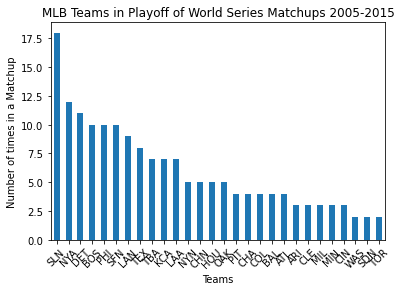

In [155]:
# Ended up not using this in presentation, just for peliminary work up.

playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])

playoff_count_df = playoff_count_df.value_counts()

playoff_chart = playoff_count_df.plot.bar(rot=45)
plt.title("MLB Teams in Playoff of World Series Matchups 2005-2015")
plt.xlabel("Teams")
plt.ylabel("Number of times in a Matchup")
playoff_chart
playoff_count_df.count()

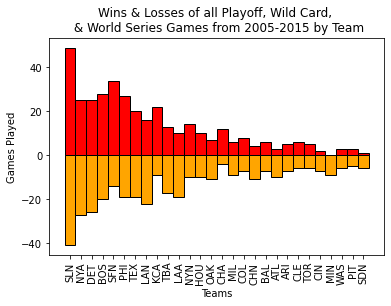

,W-Win,W-Loss,L-Win,L-Loss,Total Wins,Total Losses,Total Games
Teams,,,,,,,
SLN,39.0,19.0,10.0,22.0,49.0,41.0,90.0
NYA,17.0,6.0,8.0,21.0,25.0,27.0,52.0
DET,20.0,7.0,5.0,19.0,25.0,26.0,51.0
BOS,25.0,10.0,3.0,10.0,28.0,20.0,48.0
SFN,34.0,14.0,0.0,0.0,34.0,14.0,48.0
PHI,21.0,5.0,6.0,14.0,27.0,19.0,46.0
TEX,14.0,7.0,6.0,12.0,20.0,19.0,39.0
LAN,9.0,1.0,7.0,21.0,16.0,22.0,38.0
KCA,19.0,5.0,3.0,4.0,22.0,9.0,31.0


In [156]:
# stacked bar graph for wins and loses per match up AND ratio of wins to total games played per year per team

wins_losses_df = playoffs_df.copy()

# Seperating out data by team for wins and losses

wins = wins_losses_df[["teamIDwinner", "wins",
                       "losses"]].rename(columns={"teamIDwinner":"Teams", "wins": "W-Win", "losses":"W-Loss"})

losses = wins_losses_df[["teamIDloser", "losses",
                         "wins"]].rename(columns={"teamIDloser":"Teams", "losses":"L-Win", "wins":"L-Loss"})

win_data = wins.groupby(["Teams"]).sum()

loss_data = losses.groupby(["Teams"]).sum()

games_df = pd.merge(win_data, loss_data, on="Teams", how="outer")

games_df = games_df.fillna(0)

games_df["Total Wins"] = games_df["W-Win"] + games_df["L-Win"]

games_df["Total Losses"] = games_df["W-Loss"] + games_df["L-Loss"]

games_df["Total Games"] = games_df["Total Wins"] + games_df["Total Losses"]

games_df.sort_values(by=["Total Games"], inplace=True, ascending=False)

# Bar chart

win_bar = games_df["Total Wins"]
loss_bar = games_df["Total Losses"]*(-1)

bars = np.add(win_bar, loss_bar).tolist()

r = np.arange(0,56,2)

names = games_df.index.values
width = 2

plt.bar(r, win_bar, color='red', edgecolor='black', width=width)
plt.bar(r, loss_bar, color='orange', edgecolor='black', width=width)

plt.xticks(r, names, rotation=90)
plt.xlabel("Teams")
plt.ylabel("Games Played")
plt.title("Wins & Losses of all Playoff, Wild Card, \n & World Series Games from 2005-2015 by Team")
plt.show()

# This is just a check. It provides the totals of all games per team. Since every match has a winner and a loser,
# the "Total Games" will be double the number of matches in the playoffs and WS between 2005-2015.
# games_df.sum()

games_df

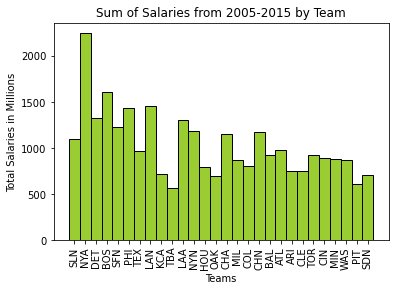

In [157]:
# Sum of salaries by year and team

#teams_salary_sum = playoff_count_df.rename(columns={"teamIDwinner":"Teams", "wins": "W-Win", "losses":"W-Loss"})
teams_games = games_df.reset_index()
teams_games = teams_games[["Teams", "Total Games"]].rename(columns={"Teams":"teamID"})

salaries_total = salaries_df.groupby(["teamID"]).sum()

salary_sum = pd.merge(teams_games, salaries_total, on="teamID", how="left")
salary_sum["Total Player Salary (Millions)"]  = salary_sum["salary"]/1000000

money_bar = salary_sum["Total Player Salary (Millions)"]

r = np.arange(0,56,2)

width = 2

plt.bar(r, money_bar, color='yellowgreen', edgecolor='black', width=width)

plt.xticks(r, salary_sum["teamID"], rotation=90)
plt.xlabel("Teams")
plt.ylabel("Total Salaries in Millions")
plt.title("Sum of Salaries from 2005-2015 by Team")
plt.show()

In [158]:
# ratio of wins to total games played per year per team, did not include in presentation
# This did help me get started for the spaghetti chart though

wins_year = wins_losses_df[["teamIDwinner", "wins", "losses", 
                       "yearID"]].rename(columns={"teamIDwinner":"Teams", "wins": "Wins", "losses":"Losses"})

wins_year = wins_year.groupby(["Teams", "yearID"]).sum()

wins_year = wins_year.reset_index()

losses_year = wins_losses_df[["teamIDloser", "losses",
                              "wins", "yearID"]].rename(columns={"teamIDloser":"Teams", "losses":"Wins", "wins":"Losses"})

losses_year = losses_year.groupby(["Teams", "yearID"]).sum()

losses_year = losses_year.reset_index()

ratio_df = wins_year.append(losses_year)

ratio_df = ratio_df.groupby(["yearID", "Teams"]).sum()

ratio_df["Total Games"] = ratio_df["Wins"] + ratio_df["Losses"]

ratio_df["Ratio of Wins"] = ratio_df["Wins"] / ratio_df["Total Games"]

ratio_df = ratio_df.reset_index()

df_years = ratio_df["yearID"].drop_duplicates()

ratio_df

,yearID,Teams,Wins,Losses,Total Games,Ratio of Wins
0,2005,ATL,1,3,4,0.250000
1,2005,BOS,0,3,3,0.000000
2,2005,CHA,11,1,12,0.916667
3,2005,HOU,7,7,14,0.500000
4,2005,LAA,4,6,10,0.400000
...,...,...,...,...,...,...
91,2015,NYN,8,6,14,0.571429
92,2015,PIT,0,1,1,0.000000
93,2015,SLN,1,3,4,0.250000
94,2015,TEX,2,3,5,0.400000


In [159]:
# Making the spaghetti chart of total games by team broken down by year

ratio_years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

filter_SLN = ratio_df["Teams"].isin(["SLN"])
SLN_ratio = ratio_df[filter_SLN]
SLN_games = pd.merge(df_years, SLN_ratio, on="yearID", how="outer")
SLN_games = SLN_games.fillna(0)

filter_NYA = ratio_df["Teams"].isin(["NYA"])
NYA_ratio = ratio_df[filter_NYA]
NYA_games = pd.merge(df_years, NYA_ratio, on="yearID", how="outer")
NYA_games = NYA_games.fillna(0)

filter_DET = ratio_df["Teams"].isin(["DET"])
DET_ratio = ratio_df[filter_DET]
DET_games = pd.merge(df_years, DET_ratio, on="yearID", how="outer")
DET_games = DET_games.fillna(0)

filter_BOS = ratio_df["Teams"].isin(["BOS"])
BOS_ratio = ratio_df[filter_BOS]
BOS_games = pd.merge(df_years, BOS_ratio, on="yearID", how="outer")
BOS_games = BOS_games.fillna(0)

filter_PHI = ratio_df["Teams"].isin(["PHI"])
PHI_ratio = ratio_df[filter_PHI]
PHI_games = pd.merge(df_years, PHI_ratio, on="yearID", how="outer")
PHI_games = PHI_games.fillna(0)

filter_SFN = ratio_df["Teams"].isin(["SFN"])
SFN_ratio = ratio_df[filter_SFN]
SFN_games = pd.merge(df_years, SFN_ratio, on="yearID", how="outer")
SFN_games = SFN_games.fillna(0)

filter_LAN = ratio_df["Teams"].isin(["LAN"])
LAN_ratio = ratio_df[filter_LAN]
LAN_games = pd.merge(df_years, LAN_ratio, on="yearID", how="outer")
LAN_games = LAN_games.fillna(0)

filter_TEX = ratio_df["Teams"].isin(["TEX"])
TEX_ratio = ratio_df[filter_TEX]
TEX_games = pd.merge(df_years, TEX_ratio, on="yearID", how="outer")
TEX_games = TEX_games.fillna(0)

filter_LAA = ratio_df["Teams"].isin(["LAA"])
LAA_ratio = ratio_df[filter_LAA]
LAA_games = pd.merge(df_years, LAA_ratio, on="yearID", how="outer")
LAA_games = LAA_games.fillna(0)

filter_TBA = ratio_df["Teams"].isin(["TBA"])
TBA_ratio = ratio_df[filter_TBA]
TBA_games = pd.merge(df_years, TBA_ratio, on="yearID", how="outer")
TBA_games = TBA_games.fillna(0)

filter_KCA = ratio_df["Teams"].isin(["KCA"])
KCA_ratio = ratio_df[filter_KCA]
KCA_games = pd.merge(df_years, KCA_ratio, on="yearID", how="outer")
KCA_games = KCA_games.fillna(0)

filter_HOU = ratio_df["Teams"].isin(["HOU"])
HOU_ratio = ratio_df[filter_HOU]
HOU_games = pd.merge(df_years, HOU_ratio, on="yearID", how="outer")
HOU_games = HOU_games.fillna(0)

filter_CHN = ratio_df["Teams"].isin(["CHN"])
CHN_ratio = ratio_df[filter_CHN]
CHN_games = pd.merge(df_years, CHN_ratio, on="yearID", how="outer")
CHN_games = CHN_games.fillna(0)

filter_NYN = ratio_df["Teams"].isin(["NYN"])
NYN_ratio = ratio_df[filter_NYN]
NYN_games = pd.merge(df_years, NYN_ratio, on="yearID", how="outer")
NYN_games = NYN_games.fillna(0)

filter_OAK = ratio_df["Teams"].isin(["OAK"])
OAK_ratio = ratio_df[filter_OAK]
OAK_games = pd.merge(df_years, OAK_ratio, on="yearID", how="outer")
OAK_games = OAK_games.fillna(0)

filter_ATL = ratio_df["Teams"].isin(["ATL"])
ATL_ratio = ratio_df[filter_ATL]
ATL_games = pd.merge(df_years, ATL_ratio, on="yearID", how="outer")
ATL_games = ATL_games.fillna(0)

filter_COL = ratio_df["Teams"].isin(["COL"])
COL_ratio = ratio_df[filter_COL]
COL_games = pd.merge(df_years, COL_ratio, on="yearID", how="outer")
COL_games = COL_games.fillna(0)

filter_BAL = ratio_df["Teams"].isin(["BAL"])
BAL_ratio = ratio_df[filter_BAL]
BAL_games = pd.merge(df_years, BAL_ratio, on="yearID", how="outer")
BAL_games = BAL_games.fillna(0)

filter_CHA = ratio_df["Teams"].isin(["CHA"])
CHA_ratio = ratio_df[filter_CHA]
CHA_games = pd.merge(df_years, CHA_ratio, on="yearID", how="outer")
CHA_games = CHA_games.fillna(0)

filter_PIT = ratio_df["Teams"].isin(["PIT"])
PIT_ratio = ratio_df[filter_PIT]
PIT_games = pd.merge(df_years, PIT_ratio, on="yearID", how="outer")
PIT_games = PIT_games.fillna(0)

filter_CLE = ratio_df["Teams"].isin(["CLE"])
CLE_ratio = ratio_df[filter_CLE]
CLE_games = pd.merge(df_years, CLE_ratio, on="yearID", how="outer")
CLE_games = CLE_games.fillna(0)

filter_ARI = ratio_df["Teams"].isin(["ARI"])
ARI_ratio = ratio_df[filter_ARI]
ARI_games = pd.merge(df_years, ARI_ratio, on="yearID", how="outer")
ARI_games = ARI_games.fillna(0)

filter_MIN = ratio_df["Teams"].isin(["MIN"])
MIN_ratio = ratio_df[filter_MIN]
MIN_games = pd.merge(df_years, MIN_ratio, on="yearID", how="outer")
MIN_games = MIN_games.fillna(0)

filter_MIL = ratio_df["Teams"].isin(["MIL"])
MIL_ratio = ratio_df[filter_MIL]
MIL_games = pd.merge(df_years, MIL_ratio, on="yearID", how="outer")
MIL_games = MIL_games.fillna(0)

filter_CIN = ratio_df["Teams"].isin(["CIN"])
CIN_ratio = ratio_df[filter_CIN]
CIN_games = pd.merge(df_years, CIN_ratio, on="yearID", how="outer")
CIN_games = CIN_games.fillna(0)

filter_WAS = ratio_df["Teams"].isin(["WAS"])
WAS_ratio = ratio_df[filter_WAS]
WAS_games = pd.merge(df_years, WAS_ratio, on="yearID", how="outer")
WAS_games = WAS_games.fillna(0)

filter_TOR = ratio_df["Teams"].isin(["TOR"])
TOR_ratio = ratio_df[filter_TOR]
TOR_games = pd.merge(df_years, TOR_ratio, on="yearID", how="outer")
TOR_games = TOR_games.fillna(0)

filter_SDN = ratio_df["Teams"].isin(["SDN"])
SDN_ratio = ratio_df[filter_SDN]
SDN_games = pd.merge(df_years, SDN_ratio, on="yearID", how="outer")
SDN_games = SDN_games.fillna(0)

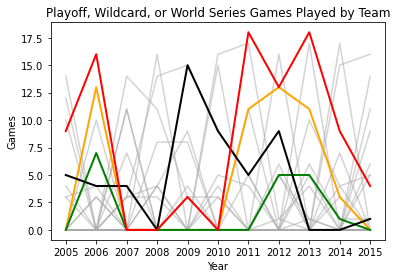

In [160]:
# The actual spaghetti chart

BOS = plt.plot(ratio_years, BOS_games["Total Games"], color="darkgray", label="4", alpha=0.5)
PHI = plt.plot(ratio_years, PHI_games["Total Games"], color="darkgray", label="5", alpha=0.5)
SFN = plt.plot(ratio_years, SFN_games["Total Games"], color="darkgray", label="6", alpha=0.5)
LAN = plt.plot(ratio_years, LAN_games["Total Games"], color="darkgray", label="7", alpha=0.5)
TEX = plt.plot(ratio_years, TEX_games["Total Games"], color="darkgray", label="8", alpha=0.5)
LAA = plt.plot(ratio_years, LAA_games["Total Games"], color="darkgray", label="9", alpha=0.5)
TBA = plt.plot(ratio_years, TBA_games["Total Games"], color="darkgray", label="10", alpha=0.5)
KCA = plt.plot(ratio_years, KCA_games["Total Games"], color="darkgray", label="11", alpha=0.5)
HOU = plt.plot(ratio_years, HOU_games["Total Games"], color="darkgray", label="12", alpha=0.5)
CHN = plt.plot(ratio_years, CHN_games["Total Games"], color="darkgray", label="13", alpha=0.5)
NYN = plt.plot(ratio_years, NYN_games["Total Games"], color="darkgray", label="14", alpha=0.5)
ATL = plt.plot(ratio_years, ATL_games["Total Games"], color="darkgray", label="16", alpha=0.5)
COL = plt.plot(ratio_years, COL_games["Total Games"], color="darkgray", label="17", alpha=0.5)
BAL = plt.plot(ratio_years, BAL_games["Total Games"], color="darkgray", label="18", alpha=0.5)
CHA = plt.plot(ratio_years, CHA_games["Total Games"], color="darkgray", label="19", alpha=0.5)
PIT = plt.plot(ratio_years, PIT_games["Total Games"], color="darkgray", label="20", alpha=0.5)
CLE = plt.plot(ratio_years, CLE_games["Total Games"], color="darkgray", label="21", alpha=0.5)
ARI = plt.plot(ratio_years, ARI_games["Total Games"], color="darkgray", label="22", alpha=0.5)
MIN = plt.plot(ratio_years, MIN_games["Total Games"], color="darkgray", label="23", alpha=0.5)
MIL = plt.plot(ratio_years, MIL_games["Total Games"], color="darkgray", label="24", alpha=0.5)
CIN = plt.plot(ratio_years, CIN_games["Total Games"], color="darkgray", label="25", alpha=0.5)
WAS = plt.plot(ratio_years, WAS_games["Total Games"], color="darkgray", label="26", alpha=0.5)
TOR = plt.plot(ratio_years, TOR_games["Total Games"], color="darkgray", label="27", alpha=0.5)
SDN = plt.plot(ratio_years, SDN_games["Total Games"], color="darkgray", label="28", alpha=0.5)

DET = plt.plot(ratio_years, DET_games["Total Games"], color="orange", label="3", linewidth=2)
OAK = plt.plot(ratio_years, OAK_games["Total Games"], color="green", label="15", linewidth=2)
NYA = plt.plot(ratio_years, NYA_games["Total Games"], color="black", label="2", linewidth=2)
SLN = plt.plot(ratio_years, SLN_games["Total Games"], color="red", label="1", linewidth=2)

plt.title("Playoff, Wildcard, or World Series Games Played by Team")
plt.xlabel("Year")
plt.ylabel("Games")

plt.show()

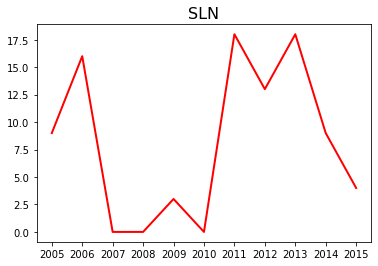

In [161]:
# Individual chart that is easier to read and use for teams we're singling out for deep dive

SLN = plt.plot(ratio_years, SLN_games["Total Games"], color="red", label="1", linewidth=2)
plt.title("SLN", fontsize=16)


plt.show()

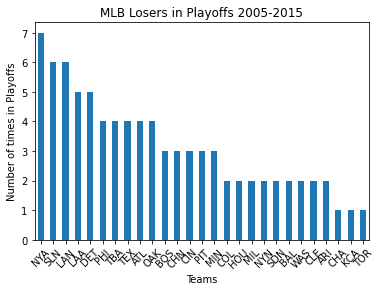

In [162]:
# Ended up not using this in presentation, just for peliminary work up.

loser_teams = playoffs_df['teamIDloser'].value_counts()

playoffs_loses = loser_teams.plot.bar(rot=45)
plt.title("MLB Losers in Playoffs 2005-2015")
plt.xlabel("Teams")
plt.ylabel("Number of times in Playoffs")
playoffs_loses

In [118]:
#MONEY SECTION
#How much is a team that got to the playoffs between 2005-2015 spending #per year
# #What is the average per team per general player per    
# Create 2 dataframes answering 2 objectives:
# salaries_describe['Sum'] - How much is a play offs team spends total per year 
# salaries_describe['mean'] - How much the playoff team spends per general player per year
# top_ten_sum; top_ten_mean - Find the teams that spend Too Much - top 10% (?) 
# Make Bar graph for 1 and 2

#limiting the salaries_test_df to only the 4 teams we will presenting about
salaries_test_df = salaries_df.loc[salaries_df['teamID'].isin(['SLN','NYA','DET','OAK'])]
salaries_test_df = salaries_test_df.loc[salaries_test_df['yearID']>2004]

salaries_test_df = salaries_test_df.groupby(['yearID', 'teamID'])

salaries_describe = salaries_test_df.describe()/1000000
salaries_describe['salary','Sum'] = salaries_test_df.sum()/1000000

salaries_for_line_df = pd.DataFrame(data={'Mean':salaries_describe['salary','mean'],'Sum':salaries_describe['salary','Sum']})
#in order to capture SLN and OAK data we had to lower the quantile to top 50% not top 10% - these teams have much smaller budgets than NYA and DET, for example
quantile_075 = salaries_describe.quantile(.50)

#top_ten_mean and top_ten_sum will help us determine the overall trends in managing the team payrol and team roster (hiring and training a quantity of players vs hiring select small number of star players requiring high salaries)
top_ten_mean = salaries_describe.loc[salaries_describe['salary','mean']>quantile_075['salary']['mean']]
top_ten_sum = salaries_describe.loc[salaries_describe['salary','Sum']>quantile_075['salary']['Sum']]
top_ten_mean

salary                                                    \
                  count      mean       std       min       25%       50%   
yearID teamID                                                               
2005   NYA     0.000026  8.011801  7.117015  0.317200  2.187500  5.833334   
2006   NYA     0.000028  6.952253  7.343890  0.328600  0.912500  2.925000   
2007   NYA     0.000028  6.759252  7.725153  0.382048  0.450042  2.250000   
2008   DET     0.000030  4.589507  4.847263  0.390000  0.420000  1.487500   
       NYA     0.000030  6.929893  8.164959  0.390000  0.400313  2.437500   
2009   DET     0.000028  4.110184  4.865921  0.400000  0.746250  2.237500   
       NYA     0.000026  7.748046  8.596408  0.400000  0.438506  5.200000   
2010   DET     0.000027  4.550553  5.770276  0.400000  0.416750  1.500000   
       NYA     0.000025  8.253336  9.267188  0.410800  0.487975  5.500000   
2011   DET     0.000027  3.914823  5.259443  0.414000  0.430000  1.300000   
       NYA     0.000029  6.975001  8.531288  0.419300  0.650000  2.700000   
2012   DET     0.000029  4.562069  6.557916  0.480000  0.495000  1.100000   
       NYA     0.000029  6.776631  8.119776  0.482000  0.528475  2.800000   
       SLN     0.000028  3.939316  4.858527  0.480000  0.495000  0.800000   
2013   DET     0.000024  6.082896  6.873032  0.490000  0.763750  3.750000   
       NYA     0.000031  7.483190  8.784431  0.490000  0.546813  2.850000   
2014   DET     0.000023  6.645891  7.276494  0.500000  0.515000  2.500000   
       NYA     0.000024  8.230996  8.609457  0.502100  0.537919  4.357500   
       SLN     0.000028  4.310464  6.143556  0.500000  0.517500  0.767500   
2015   DET     0.000025  6.891390  8.081387  0.507500  0.520000  3.000000   
       NYA     0.000029  7.336274  8.355235  0.507500  0.554100  3.300000   
       SLN     0.000026  4.586212  5.801085  0.507500  0.524000  2.000000   

                                                 
                     75%        max         Sum  
yearID teamID                                    
2005   NYA     12.839286  26.000000  208.306817  
2006   NYA     12.250000  21.680727  194.663079  
2007   NYA     12.250000  23.428571  189.259045  
2008   DET      7.750000  15.768174  137.685196  
       NYA     13.000000  28.000000  207.896789  
2009   DET      5.025000  18.971596  115.085145  
       NYA     13.075000  33.000000  201.449189  
2010   DET      6.868026  20.000000  122.864928  
       NYA     13.100000  33.000000  206.333389  
2011   DET      5.500000  20.000000  105.700231  
       NYA     10.000000  32.000000  202.275028  
2012   DET      5.500000  23.000000  132.300000  
       NYA     10.250000  30.000000  196.522289  
       SLN      7.375000  16.292362  110.300862  
2013   DET      7.243750  23.000000  145.989500  
       NYA     13.500000  29.000000  231.978886  
2014   DET     13.000000  22.000000  152.855500  
       NYA     16.250000  23.000000  197.543907  
       SLN      5.812500  19.500000  120.693000  
2015   DET     10.500000  28.000000  172.284750  
       NYA     13.000000  23.125000  212.751957  
       SLN      6.281250  19.500000  119.241500

In [119]:
top_ten_sum

salary                                                    \
                  count      mean       std       min       25%       50%   
yearID teamID                                                               
2005   NYA     0.000026  8.011801  7.117015  0.317200  2.187500  5.833334   
2006   NYA     0.000028  6.952253  7.343890  0.328600  0.912500  2.925000   
2007   NYA     0.000028  6.759252  7.725153  0.382048  0.450042  2.250000   
2008   DET     0.000030  4.589507  4.847263  0.390000  0.420000  1.487500   
       NYA     0.000030  6.929893  8.164959  0.390000  0.400313  2.437500   
2009   DET     0.000028  4.110184  4.865921  0.400000  0.746250  2.237500   
       NYA     0.000026  7.748046  8.596408  0.400000  0.438506  5.200000   
2010   DET     0.000027  4.550553  5.770276  0.400000  0.416750  1.500000   
       NYA     0.000025  8.253336  9.267188  0.410800  0.487975  5.500000   
2011   DET     0.000027  3.914823  5.259443  0.414000  0.430000  1.300000   
       NYA     0.000029  6.975001  8.531288  0.419300  0.650000  2.700000   
2012   DET     0.000029  4.562069  6.557916  0.480000  0.495000  1.100000   
       NYA     0.000029  6.776631  8.119776  0.482000  0.528475  2.800000   
       SLN     0.000028  3.939316  4.858527  0.480000  0.495000  0.800000   
2013   DET     0.000024  6.082896  6.873032  0.490000  0.763750  3.750000   
       NYA     0.000031  7.483190  8.784431  0.490000  0.546813  2.850000   
2014   DET     0.000023  6.645891  7.276494  0.500000  0.515000  2.500000   
       NYA     0.000024  8.230996  8.609457  0.502100  0.537919  4.357500   
       SLN     0.000028  4.310464  6.143556  0.500000  0.517500  0.767500   
2015   DET     0.000025  6.891390  8.081387  0.507500  0.520000  3.000000   
       NYA     0.000029  7.336274  8.355235  0.507500  0.554100  3.300000   
       SLN     0.000026  4.586212  5.801085  0.507500  0.524000  2.000000   

                                                 
                     75%        max         Sum  
yearID teamID                                    
2005   NYA     12.839286  26.000000  208.306817  
2006   NYA     12.250000  21.680727  194.663079  
2007   NYA     12.250000  23.428571  189.259045  
2008   DET      7.750000  15.768174  137.685196  
       NYA     13.000000  28.000000  207.896789  
2009   DET      5.025000  18.971596  115.085145  
       NYA     13.075000  33.000000  201.449189  
2010   DET      6.868026  20.000000  122.864928  
       NYA     13.100000  33.000000  206.333389  
2011   DET      5.500000  20.000000  105.700231  
       NYA     10.000000  32.000000  202.275028  
2012   DET      5.500000  23.000000  132.300000  
       NYA     10.250000  30.000000  196.522289  
       SLN      7.375000  16.292362  110.300862  
2013   DET      7.243750  23.000000  145.989500  
       NYA     13.500000  29.000000  231.978886  
2014   DET     13.000000  22.000000  152.855500  
       NYA     16.250000  23.000000  197.543907  
       SLN      5.812500  19.500000  120.693000  
2015   DET     10.500000  28.000000  172.284750  
       NYA     13.000000  23.125000  212.751957  
       SLN      6.281250  19.500000  119.241500

In [120]:
#mean_graph and sum_graph work will demonstrate mean vs sum of total team payroll for the select 4 teams for years 2005-2015
mean_graph_df = pd.DataFrame(data={'Mean':top_ten_mean['salary','mean'],'Sum':top_ten_mean['salary','Sum']})

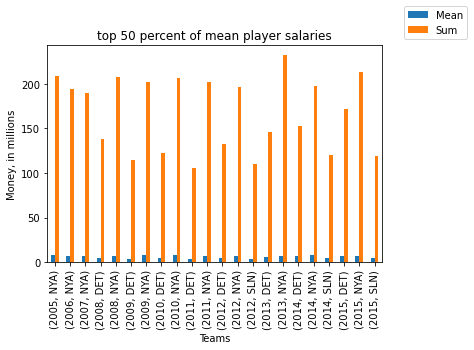

In [121]:
#this graph we ended up not using, settling for a line graph instead. But it showsa difference in sudden Sum changes. (Mean bars appear too small on the graph and hard to read)
mean_graph_df = pd.DataFrame(data={'Mean':top_ten_mean['salary','mean'],'Sum':top_ten_mean['salary','Sum']})
mean_graph_df

mean_graph_plt = mean_graph_df.plot.bar(rot=90)
plt.title("top 50 percent of mean player salaries")
plt.xlabel("Teams")
plt.ylabel("Money, in millions")
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
mean_graph_plt

In [122]:
#line chart
salaries_for_line_df.head()
nya_mean = salaries_for_line_df.xs('NYA', level='teamID')['Mean']
sln_mean = salaries_for_line_df.xs('SLN', level='teamID')['Mean']
det_mean = salaries_for_line_df.xs('DET', level='teamID')['Mean']
oak_mean = salaries_for_line_df.xs('OAK', level='teamID')['Mean']
nya_sum = salaries_for_line_df.xs('NYA', level='teamID')['Sum']
sln_sum = salaries_for_line_df.xs('SLN', level='teamID')['Sum']
det_sum = salaries_for_line_df.xs('DET', level='teamID')['Sum']
oak_sum = salaries_for_line_df.xs('OAK', level='teamID')['Sum']

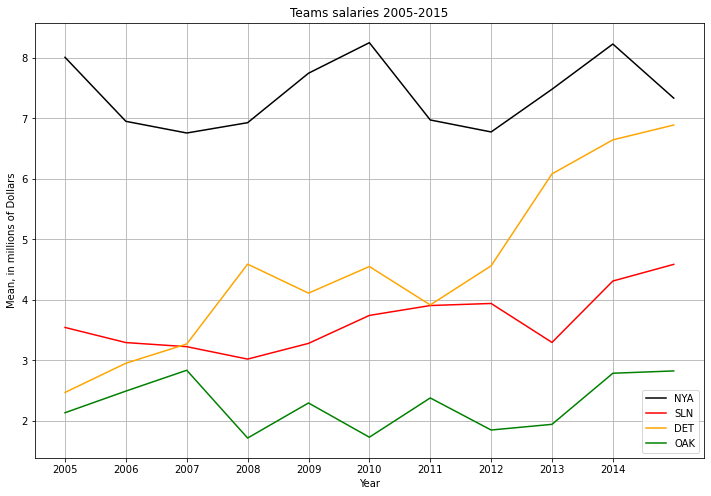

In [123]:
plt.figure(figsize =[12,8])
nya = plt.plot( nya_mean.index, nya_mean, color='black', label='NYA')
sln = plt.plot(sln_mean.index, sln_mean, color="red", label='SLN')
det = plt.plot(det_mean.index, det_mean, color="orange", label='DET')
oak = plt.plot(oak_mean.index, oak_mean, color="green", label='OAK')

plt.title("Teams salaries 2005-2015")
plt.xlabel("Year")
plt.ylabel("Mean, in millions of Dollars")
plt.grid(b=True)
plt.xticks(np.arange(2005,2015,step=1))
plt.legend()

plt.show()

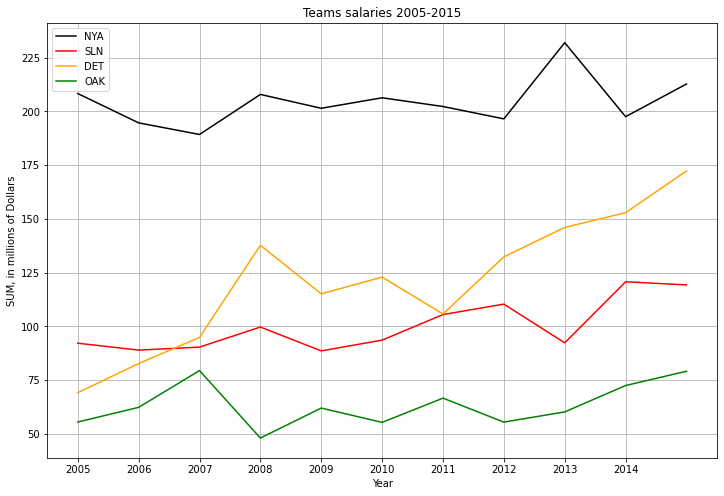

In [124]:
plt.figure(figsize =[12,8])
nyaS = plt.plot(nya_sum.index, nya_sum, color='black', label='NYA')
slnS = plt.plot(sln_sum.index, sln_sum, color="red", label='SLN')
detS = plt.plot(det_sum.index, det_sum, color="orange", label='DET')
oakS = plt.plot(oak_sum.index, oak_sum, color="green", label='OAK')

plt.title("Teams salaries 2005-2015")
plt.xlabel("Year")
plt.ylabel("SUM, in millions of Dollars")
plt.grid(b=True)
plt.xticks(np.arange(2005,2015,step=1))
plt.legend()

plt.show()

In [163]:
#PLAYERS SALARIES SECTION

salaries_master_df = pd.merge(salaries_df, master_df, on="playerID", how="outer")
salaries_master_df.head()

,yearID,teamID,lgID,playerID,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,2005.0,ARI,NL,aquingr01,325000.0,1978.0,1.0,11.0,D.R.,San Cristobal,...,Aquino,Gregori Emilio,190.0,73.0,R,R,2004-07-02,2009-06-17,aquig001,aquingr01
1,2006.0,ARI,NL,aquingr01,342000.0,1978.0,1.0,11.0,D.R.,San Cristobal,...,Aquino,Gregori Emilio,190.0,73.0,R,R,2004-07-02,2009-06-17,aquig001,aquingr01
2,2007.0,MIL,NL,aquingr01,399000.0,1978.0,1.0,11.0,D.R.,San Cristobal,...,Aquino,Gregori Emilio,190.0,73.0,R,R,2004-07-02,2009-06-17,aquig001,aquingr01
3,2008.0,BAL,AL,aquingr01,500000.0,1978.0,1.0,11.0,D.R.,San Cristobal,...,Aquino,Gregori Emilio,190.0,73.0,R,R,2004-07-02,2009-06-17,aquig001,aquingr01
4,2005.0,ARI,NL,brunebr01,322500.0,1982.0,2.0,17.0,USA,OR,...,Bruney,Brian Anthony,235.0,75.0,R,R,2004-05-08,2012-06-24,brunb001,brunebr01


In [126]:
#Find top salaries - using df with years 2005-2015 and selecting for playoff teams
#Looking for top 10%, narrow down to 900ish rows

#salaries_yr.describe()
salaries_yr_df = salaries_master_df.loc[salaries_master_df['teamID'].isin(playoff_count_df.index)]
salaries_yr_df.head()

#remove unneccessary columns
reduced_df = salaries_yr_df[["playerID","nameFirst","nameLast", "yearID", "teamID", "salary"]]
reduced_df.head()

millions_of_dollars = reduced_df["salary"]/1000000
reduced_df["Salary in Millions"] = millions_of_dollars
reduced_df

salaries_millions = reduced_df.loc[reduced_df["Salary in Millions"]>9.5]
salaries_millions

#select years 2005-2015
reduced_df_yrs = reduced_df.loc[reduced_df['yearID'] > 2004]
reduced_df_yrs.head()

# #groupby players
top_total_spenders = salaries_millions.groupby(["playerID", "yearID"]).sum()
top_total_spenders.head()
#top_total_spenders.count()

salary  Salary in Millions
playerID  yearID                                
abreubo01 2004.0  10600000.0                10.6
          2005.0  13100000.0                13.1
          2006.0  13600000.0                13.6
          2007.0  15000000.0                15.0
          2008.0  16000000.0                16.0

In [127]:
top_total_spenders_sorted = top_total_spenders.sort_values(["Salary in Millions"], ascending=False)
top_total_spenders_sorted.head(23)

salary  Salary in Millions
playerID  yearID                                
rodrial01 2010.0  33000000.0           33.000000
          2009.0  33000000.0           33.000000
kershcl01 2015.0  32571000.0           32.571000
rodrial01 2011.0  32000000.0           32.000000
          2012.0  30000000.0           30.000000
          2013.0  29000000.0           29.000000
verlaju01 2015.0  28000000.0           28.000000
rodrial01 2008.0  28000000.0           28.000000
wellsve01 2011.0  26187500.0           26.187500
greinza01 2014.0  26000000.0           26.000000
rodrial01 2005.0  26000000.0           26.000000
howarry01 2014.0  25000000.0           25.000000
greinza01 2015.0  25000000.0           25.000000
leecl02   2013.0  25000000.0           25.000000
          2014.0  25000000.0           25.000000
howarry01 2015.0  25000000.0           25.000000
wellsve01 2013.0  24642857.0           24.642857
sabatcc01 2011.0  24285714.0           24.285714
          2013.0  24285714.0           24.285714
          2010.0  24285714.0           24.285714
wellsve01 2012.0  24187500.0           24.187500
fieldpr01 2014.0  24000000.0           24.000000
pujolal01 2015.0  24000000.0           24.000000

In [128]:
#Top 10 earners average
#1 A Rod
rodrial01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="rodrial01"]
#rod_df = rodrial01.set_index("yearID")
rodrial01


,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
12212,rodrial01,Alex,Rodriguez,2005.0,NYA,26000000.0,26.000000
12213,rodrial01,Alex,Rodriguez,2006.0,NYA,21680727.0,21.680727
12214,rodrial01,Alex,Rodriguez,2007.0,NYA,22708525.0,22.708525
12215,rodrial01,Alex,Rodriguez,2008.0,NYA,28000000.0,28.000000
12216,rodrial01,Alex,Rodriguez,2009.0,NYA,33000000.0,33.000000
12217,rodrial01,Alex,Rodriguez,2010.0,NYA,33000000.0,33.000000
12218,rodrial01,Alex,Rodriguez,2011.0,NYA,32000000.0,32.000000
12219,rodrial01,Alex,Rodriguez,2012.0,NYA,30000000.0,30.000000
12220,rodrial01,Alex,Rodriguez,2013.0,NYA,29000000.0,29.000000
12221,rodrial01,Alex,Rodriguez,2015.0,NYA,22000000.0,22.000000


In [129]:
#2
kershcl01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="kershcl01"]
kershcl01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
23035,kershcl01,Clayton,Kershaw,2009.0,LAN,404000.0,0.404
23036,kershcl01,Clayton,Kershaw,2010.0,LAN,440000.0,0.440
23037,kershcl01,Clayton,Kershaw,2011.0,LAN,500000.0,0.500
23038,kershcl01,Clayton,Kershaw,2012.0,LAN,7750000.0,7.750
23039,kershcl01,Clayton,Kershaw,2013.0,LAN,11750000.0,11.750
23040,kershcl01,Clayton,Kershaw,2014.0,LAN,4000000.0,4.000
23041,kershcl01,Clayton,Kershaw,2015.0,LAN,32571000.0,32.571


In [130]:
#3
verlaju01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="verlaju01"]
verlaju01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
20844,verlaju01,Justin,Verlander,2006.0,DET,980000.0,0.980
20845,verlaju01,Justin,Verlander,2007.0,DET,1030000.0,1.030
20846,verlaju01,Justin,Verlander,2008.0,DET,1130000.0,1.130
20847,verlaju01,Justin,Verlander,2009.0,DET,3675000.0,3.675
20848,verlaju01,Justin,Verlander,2010.0,DET,6850000.0,6.850
20849,verlaju01,Justin,Verlander,2011.0,DET,12850000.0,12.850
20850,verlaju01,Justin,Verlander,2012.0,DET,20100000.0,20.100
20851,verlaju01,Justin,Verlander,2013.0,DET,20100000.0,20.100
20852,verlaju01,Justin,Verlander,2014.0,DET,20000000.0,20.000
20853,verlaju01,Justin,Verlander,2015.0,DET,28000000.0,28.000


In [131]:
#4
wellsve01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="wellsve01"]
wellsve01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
16952,wellsve01,Vernon,Wells,2005.0,TOR,3070000.0,3.070000
16953,wellsve01,Vernon,Wells,2006.0,TOR,4470000.0,4.470000
16954,wellsve01,Vernon,Wells,2007.0,TOR,8787500.0,8.787500
16955,wellsve01,Vernon,Wells,2008.0,TOR,3687500.0,3.687500
16956,wellsve01,Vernon,Wells,2009.0,TOR,4687500.0,4.687500
16957,wellsve01,Vernon,Wells,2010.0,TOR,15687500.0,15.687500
16958,wellsve01,Vernon,Wells,2011.0,LAA,26187500.0,26.187500
16959,wellsve01,Vernon,Wells,2012.0,LAA,24187500.0,24.187500
16960,wellsve01,Vernon,Wells,2013.0,NYA,24642857.0,24.642857


In [132]:
#5
greinza01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="greinza01"]
greinza01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
20199,greinza01,Zack,Greinke,2005.0,KCA,330500.0,0.3305
20200,greinza01,Zack,Greinke,2006.0,KCA,365500.0,0.3655
20201,greinza01,Zack,Greinke,2007.0,KCA,407000.0,0.4070
20202,greinza01,Zack,Greinke,2008.0,KCA,1400000.0,1.4000
20203,greinza01,Zack,Greinke,2009.0,KCA,3750000.0,3.7500
20204,greinza01,Zack,Greinke,2010.0,KCA,7250000.0,7.2500
20205,greinza01,Zack,Greinke,2011.0,MIL,13500000.0,13.5000
20206,greinza01,Zack,Greinke,2012.0,MIL,13500000.0,13.5000
20207,greinza01,Zack,Greinke,2013.0,LAN,21000000.0,21.0000
20208,greinza01,Zack,Greinke,2014.0,LAN,26000000.0,26.0000


In [133]:
#6
howarry01 =reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="howarry01"]
howarry01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
21120,howarry01,Ryan,Howard,2006.0,PHI,355000.0,0.355
21121,howarry01,Ryan,Howard,2007.0,PHI,900000.0,0.900
21122,howarry01,Ryan,Howard,2008.0,PHI,10000000.0,10.000
21123,howarry01,Ryan,Howard,2009.0,PHI,15000000.0,15.000
21124,howarry01,Ryan,Howard,2010.0,PHI,19000000.0,19.000
21125,howarry01,Ryan,Howard,2011.0,PHI,20000000.0,20.000
21126,howarry01,Ryan,Howard,2012.0,PHI,20000000.0,20.000
21127,howarry01,Ryan,Howard,2013.0,PHI,20000000.0,20.000
21128,howarry01,Ryan,Howard,2014.0,PHI,25000000.0,25.000
21129,howarry01,Ryan,Howard,2015.0,PHI,25000000.0,25.000


In [134]:
#7
leecl02 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="leecl02"]
leecl02

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
18730,leecl02,Cliff,Lee,2005.0,CLE,345000.0,0.3450
18731,leecl02,Cliff,Lee,2006.0,CLE,406200.0,0.4062
18732,leecl02,Cliff,Lee,2007.0,CLE,3000000.0,3.0000
18733,leecl02,Cliff,Lee,2008.0,CLE,4000000.0,4.0000
18734,leecl02,Cliff,Lee,2009.0,CLE,6000000.0,6.0000
18736,leecl02,Cliff,Lee,2011.0,PHI,11000000.0,11.0000
18737,leecl02,Cliff,Lee,2012.0,PHI,21500000.0,21.5000
18738,leecl02,Cliff,Lee,2013.0,PHI,25000000.0,25.0000
18739,leecl02,Cliff,Lee,2014.0,PHI,25000000.0,25.0000


In [135]:
#8
sabatcc01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="sabatcc01"]
sabatcc01

sabatcc01_renamed = sabatcc01.rename(columns={"playerID":"Player ID", "nameFirst":"First Name", "nameLast":"Last Name",
                                             "yearID":"Year","teamID":"Team", "salary":"Salary",})
sabatcc01_renamed

,Player ID,First Name,Last Name,Year,Team,Salary,Salary in Millions
18078,sabatcc01,CC,Sabathia,2005.0,CLE,5250000.0,5.250000
18079,sabatcc01,CC,Sabathia,2006.0,CLE,7000000.0,7.000000
18080,sabatcc01,CC,Sabathia,2007.0,CLE,8750000.0,8.750000
18081,sabatcc01,CC,Sabathia,2008.0,CLE,11000000.0,11.000000
18082,sabatcc01,CC,Sabathia,2009.0,NYA,15285714.0,15.285714
18083,sabatcc01,CC,Sabathia,2010.0,NYA,24285714.0,24.285714
18084,sabatcc01,CC,Sabathia,2011.0,NYA,24285714.0,24.285714
18085,sabatcc01,CC,Sabathia,2012.0,NYA,23000000.0,23.000000
18086,sabatcc01,CC,Sabathia,2013.0,NYA,24285714.0,24.285714
18087,sabatcc01,CC,Sabathia,2014.0,NYA,23000000.0,23.000000


In [136]:
#9
fieldpr01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="fieldpr01"]
fieldpr01

fieldpr01_renamed = fieldpr01.rename(columns={"playerID":"Player ID", "nameFirst":"First Name", "nameLast":"Last Name",
                                              "yearID":"Year","teamID":"Team", "salary":"Salary",})
fieldpr01_renamed

,Player ID,First Name,Last Name,Year,Team,Salary,Salary in Millions
21013,fieldpr01,Prince,Fielder,2006.0,MIL,329500.0,0.3295
21014,fieldpr01,Prince,Fielder,2007.0,MIL,415000.0,0.4150
21015,fieldpr01,Prince,Fielder,2008.0,MIL,670000.0,0.6700
21016,fieldpr01,Prince,Fielder,2009.0,MIL,7000000.0,7.0000
21017,fieldpr01,Prince,Fielder,2010.0,MIL,11000000.0,11.0000
21018,fieldpr01,Prince,Fielder,2011.0,MIL,15500000.0,15.5000
21019,fieldpr01,Prince,Fielder,2012.0,DET,23000000.0,23.0000
21020,fieldpr01,Prince,Fielder,2013.0,DET,23000000.0,23.0000
21021,fieldpr01,Prince,Fielder,2014.0,TEX,24000000.0,24.0000
21022,fieldpr01,Prince,Fielder,2015.0,TEX,24000000.0,24.0000


In [137]:
#10
pujolal01 = reduced_df_yrs.loc[reduced_df_yrs["playerID"]=="pujolal01"]
pujolal01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
17840,pujolal01,Albert,Pujols,2005.0,SLN,11000000.0,11.000000
17841,pujolal01,Albert,Pujols,2006.0,SLN,14000000.0,14.000000
17842,pujolal01,Albert,Pujols,2007.0,SLN,12937813.0,12.937813
17843,pujolal01,Albert,Pujols,2008.0,SLN,13870949.0,13.870949
17844,pujolal01,Albert,Pujols,2009.0,SLN,14427326.0,14.427326
17845,pujolal01,Albert,Pujols,2010.0,SLN,14595953.0,14.595953
17846,pujolal01,Albert,Pujols,2011.0,SLN,14508395.0,14.508395
17847,pujolal01,Albert,Pujols,2012.0,LAA,12000000.0,12.000000
17848,pujolal01,Albert,Pujols,2013.0,LAA,16000000.0,16.000000
17849,pujolal01,Albert,Pujols,2014.0,LAA,23000000.0,23.000000


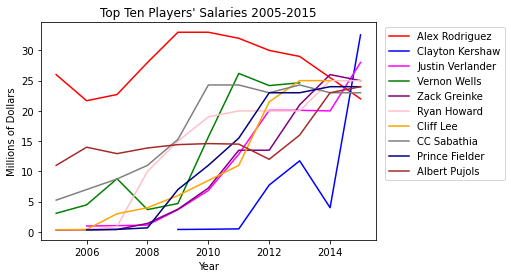

<Figure size 432x288 with 0 Axes>

In [138]:
x_axis = rodrial01.loc[:,"yearID"]
x_axis2 = kershcl01.loc[:,"yearID"]
x_axis3 = verlaju01.loc[:,"yearID"]
x_axis4 = wellsve01.loc[:,"yearID"]
x_axis5 = greinza01.loc[:,"yearID"]
x_axis6 = howarry01.loc[:,"yearID"]
x_axis7 = leecl02.loc[:,"yearID"]
x_axis8 = sabatcc01.loc[:,"yearID"]
x_axis9 = fieldpr01.loc[:,"yearID"]
x_axis10 = pujolal01.loc[:,"yearID"]

rodrial01_sal = rodrial01.loc[:,"Salary in Millions"]
kershcl01_sal = kershcl01.loc[:,"Salary in Millions"]
verlaju01_sal = verlaju01.loc[:,"Salary in Millions"]
wellsve01_sal = wellsve01.loc[:,"Salary in Millions"]
greinza01_sal = greinza01.loc[:,"Salary in Millions"]  
howarry01_sal = howarry01.loc[:,"Salary in Millions"] 
leecl02_sal = leecl02.loc[:,"Salary in Millions"]
sabatcc01_sal = sabatcc01.loc[:,"Salary in Millions"]
fieldpr01_sal = fieldpr01.loc[:,"Salary in Millions"]  
pujolal01_sal = pujolal01.loc[:,"Salary in Millions"]
    
rod, = plt.plot(x_axis, rodrial01_sal, color="red", label="Alex Rodriguez")
ker, = plt.plot(x_axis2, kershcl01_sal, color="blue", label="Clayton Kershaw")
ver, = plt.plot(x_axis3, verlaju01_sal, color="magenta", label="Justin Verlander")
wel, = plt.plot(x_axis4, wellsve01_sal, color="green", label="Vernon Wells")
gre, = plt.plot(x_axis5, greinza01_sal, color="purple", label="Zack Greinke")
how, = plt.plot(x_axis6, howarry01_sal, color="pink", label="Ryan Howard")
lee, = plt.plot(x_axis7, leecl02_sal, color="orange", label="Cliff Lee")
sab, = plt.plot(x_axis8, sabatcc01_sal, color="gray", label="CC Sabathia")
fie, = plt.plot(x_axis9, fieldpr01_sal, color="navy", label="Prince Fielder")
puj, = plt.plot(x_axis10, pujolal01_sal, color="brown", label="Albert Pujols")

plt.title("Top Ten Players' Salaries 2005-2015")
plt.xlabel("Year")
plt.ylabel("Millions of Dollars")
plt.legend(handles=[rod, ker, ver, wel, gre, how, lee, sab, fie, puj], bbox_to_anchor=(1.4, 1.0), loc='upper right') #loc="best")

plt.show()
plt.savefig("Top Players Salaries")

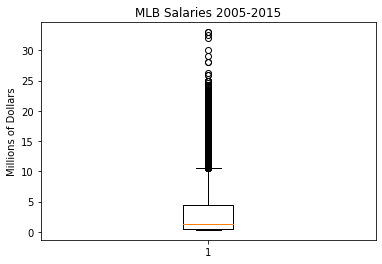

In [139]:
salaries = reduced_df_yrs["Salary in Millions"]
fig1, ax1 = plt.subplots()
ax1.set_title('MLB Salaries 2005-2015')
ax1.set_ylabel('Millions of Dollars')
ax1.boxplot(salaries)
plt.show()

In [140]:
#Individual years graphed: Not sure if needed
salaries_2005_df = reduced_df_yrs.loc[reduced_df["yearID"]==2005]
salaries_2005_df

salaries_2005 = salaries_2005_df["Salary in Millions"]

salaries_2006_df = reduced_df.loc[reduced_df["yearID"]==2006]
salaries_2006 = salaries_2006_df["Salary in Millions"]
salaries_2007_df = reduced_df.loc[reduced_df["yearID"]==2007]
salaries_2007 = salaries_2007_df["Salary in Millions"]
salaries_2008_df = reduced_df.loc[reduced_df["yearID"]==2008]
salaries_2008 = salaries_2008_df["Salary in Millions"]
salaries_2009_df = reduced_df.loc[reduced_df["yearID"]==2009]
salaries_2009 = salaries_2009_df["Salary in Millions"]
salaries_2010_df = reduced_df.loc[reduced_df["yearID"]==2010]
salaries_2010 = salaries_2010_df["Salary in Millions"]
salaries_2011_df = reduced_df.loc[reduced_df["yearID"]==2011]
salaries_2011 = salaries_2011_df["Salary in Millions"]
salaries_2012_df = reduced_df.loc[reduced_df["yearID"]==2012]
salaries_2012 = salaries_2012_df["Salary in Millions"]
salaries_2013_df = reduced_df.loc[reduced_df["yearID"]==2013]
salaries_2013 = salaries_2013_df["Salary in Millions"]
salaries_2014_df = reduced_df.loc[reduced_df["yearID"]==2014]
salaries_2014 = salaries_2014_df["Salary in Millions"]
salaries_2015_df = reduced_df.loc[reduced_df["yearID"]==2015]
salaries_2015 = salaries_2015_df["Salary in Millions"]

# fig1, ax1 = plt.subplots()
# ax1.set_title('MLB Salaries 2005')
# ax1.set_ylabel('Millions of Dollars')
# ax1.boxplot(salaries_2005)
# plt.show()

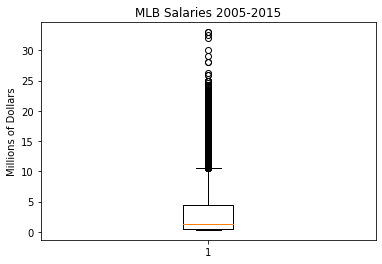

In [164]:
salaries = reduced_df_yrs["Salary in Millions"]
fig1, ax1 = plt.subplots()
ax1.set_title('MLB Salaries 2005-2015')
ax1.set_ylabel('Millions of Dollars')
ax1.boxplot(salaries)
plt.show()

In [ ]:
#Individual years graphed: Not sure if needed
salaries_2005_df = reduced_df_yrs.loc[reduced_df["yearID"]==2005]
salaries_2005_df

salaries_2005 = salaries_2005_df["Salary in Millions"]

salaries_2006_df = reduced_df.loc[reduced_df["yearID"]==2006]
salaries_2006 = salaries_2006_df["Salary in Millions"]
salaries_2007_df = reduced_df.loc[reduced_df["yearID"]==2007]
salaries_2007 = salaries_2007_df["Salary in Millions"]
salaries_2008_df = reduced_df.loc[reduced_df["yearID"]==2008]
salaries_2008 = salaries_2008_df["Salary in Millions"]
salaries_2009_df = reduced_df.loc[reduced_df["yearID"]==2009]
salaries_2009 = salaries_2009_df["Salary in Millions"]
salaries_2010_df = reduced_df.loc[reduced_df["yearID"]==2010]
salaries_2010 = salaries_2010_df["Salary in Millions"]
salaries_2011_df = reduced_df.loc[reduced_df["yearID"]==2011]
salaries_2011 = salaries_2011_df["Salary in Millions"]
salaries_2012_df = reduced_df.loc[reduced_df["yearID"]==2012]
salaries_2012 = salaries_2012_df["Salary in Millions"]
salaries_2013_df = reduced_df.loc[reduced_df["yearID"]==2013]
salaries_2013 = salaries_2013_df["Salary in Millions"]
salaries_2014_df = reduced_df.loc[reduced_df["yearID"]==2014]
salaries_2014 = salaries_2014_df["Salary in Millions"]
salaries_2015_df = reduced_df.loc[reduced_df["yearID"]==2015]
salaries_2015 = salaries_2015_df["Salary in Millions"]

fig1, ax1 = plt.subplots()
ax1.set_title('MLB Salaries 2005')
ax1.set_ylabel('Millions of Dollars')
ax1.boxplot(salaries_2005)
plt.show()

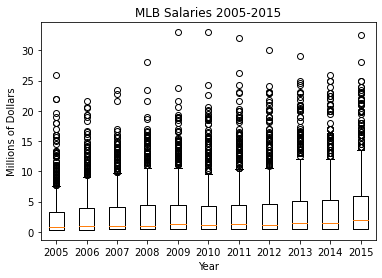

In [165]:
ten_year_salary_plot_data = [salaries_2005, salaries_2006, salaries_2007, salaries_2008, salaries_2009, salaries_2010, salaries_2011,
                            salaries_2012, salaries_2013, salaries_2014, salaries_2015]
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

fig1, ax1 = plt.subplots()
ax1.set_title("MLB Salaries 2005-2015")
ax1.set_xlabel("Year")
ax1.set_ylabel("Millions of Dollars")
ax1.boxplot(ten_year_salary_plot_data, labels = years)
plt.savefig("boxplot")
plt.show()


In [142]:
playoffs_df
playoffs_comparison_df = playoffs_df[["yearID", "round", "teamIDwinner", "teamIDloser"]]
playoffs_comparison_df

world_series_winners = playoffs_comparison_df.loc[playoffs_comparison_df["round"]=="WS"]
world_series_winners

world_series_winners_renamed = world_series_winners.rename(columns={"yearID":"Year", "round":"Round",
                                                             "teamIDwinner":"Winner", "teamIDloser":"Loser"})
world_series_winners_renamed

,Year,Round,Winner,Loser
228,2005,WS,CHA,HOU
235,2006,WS,SLN,DET
242,2007,WS,BOS,COL
249,2008,WS,PHI,TBA
256,2009,WS,NYA,PHI
263,2010,WS,SFN,TEX
270,2011,WS,SLN,TEX
279,2012,WS,SFN,DET
288,2013,WS,BOS,SLN
297,2014,WS,SFN,KCA


In [143]:
#Championship Series SECTION
playoffs_cs_df = playoffs_df.loc[playoffs_df['round'].isin(['NLCS','ALCS'])]
playoffs_cs_df.head()

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
222,2005,ALCS,CHA,AL,LAA,AL,4,1,0
225,2005,NLCS,HOU,NL,SLN,NL,4,2,0
229,2006,ALCS,DET,AL,OAK,AL,4,0,0
232,2006,NLCS,SLN,NL,NYN,NL,4,3,0
236,2007,ALCS,BOS,AL,CLE,AL,4,3,0


In [144]:
#amount of times teams made it conference championship series
winner=playoffs_cs_df['teamIDwinner'].value_counts()
print(winner)
loser=playoffs_cs_df['teamIDloser'].value_counts()
type(loser)
data= {"winner":winner,"loser":loser}
playoffs_record= pd.DataFrame(data)

playoffs1_record=playoffs_record.fillna(0)
playoffs1_record

SFN    3
SLN    3
KCA    2
PHI    2
DET    2
BOS    2
TEX    2
CHA    1
COL    1
HOU    1
NYA    1
NYN    1
TBA    1
Name: teamIDwinner, dtype: int64


,winner,loser
ARI,0.0,1.0
BAL,0.0,1.0
BOS,2.0,1.0
CHA,1.0,0.0
CHN,0.0,1.0
CLE,0.0,1.0
COL,1.0,0.0
DET,2.0,2.0
HOU,1.0,0.0
KCA,2.0,0.0


In [145]:
# Labels for the sections of our pie chart
labels = ["BOS","DET","KCA", "LAA", "TEX","NYA"]

# The values of each section of the pie chart
sizes = [3,4,3,2,2,3]

# The colors of each section of the pie chart
colors = ["blue", "orange", "lightcoral", "red","green","yellow"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0.1, 0, 0,0,0)

([<matplotlib.patches.Wedge at 0x21526e51490>,
 [Text(-0.6807815892870961, -0.8640233953358761, 'BOS'),
  Text(0.7033474334731953, -0.9722666238366251, 'DET'),
  Text(1.033661865252268, 0.37622220604743994, 'KCA'),
  Text(0.32268862466708975, 1.0516045128804186, 'LAA'),
  Text(-0.4699916107906386, 0.9945390318064048, 'TEX'),
  Text(-1.0768925074511062, 0.2242822493994323, 'NYA')],
 [Text(-0.37133541233841605, -0.47128548836502326, '17.6%'),
  Text(0.41028600285936384, -0.5671555305713645, '23.5%'),
  Text(0.5638155628648733, 0.20521211238951267, '17.6%'),
  Text(0.17601197709113983, 0.5736024615711373, '11.8%'),
  Text(-0.2563590604312574, 0.5424758355307662, '11.8%'),
  Text(-0.5873959131551488, 0.12233577239969033, '17.6%')])

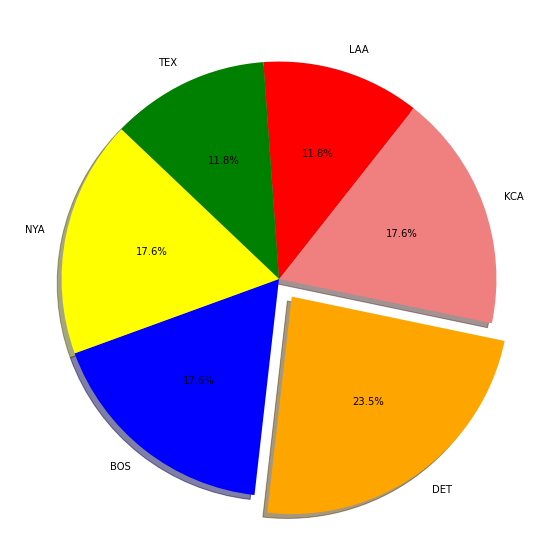

In [146]:
#ALCS appearences
plt.figure(figsize=(10, 10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

In [147]:
# Labels for the sections of our pie chart
labels = ["SLN","SFN","PHI", "NYN", "LAN","COL"]

# The values of each section of the pie chart
sizes = [6,3,3,2,3,1]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "blue","white","purple"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1,0, 0, 0,0,0)

([<matplotlib.patches.Wedge at 0x21526427a60>,
 [Text(-0.20837777631857382, -1.1817693101178954, 'SLN'),
  Text(1.0832885432166985, -0.19101291091296255, 'SFN'),
  Text(0.707066278611626, 0.8426489646645907, 'PHI'),
  Text(-0.19101313348403376, 1.0832885039714077, 'NYN'),
  Text(-0.9526280242657644, 0.5499998612577156, 'LAN'),
  Text(-1.08328849726493, -0.19101317151832783, 'COL')],
 [Text(-0.12155370285250139, -0.6893654309021057, '33.3%'),
  Text(0.590884659936381, -0.10418886049797955, '16.7%'),
  Text(0.38567251560634136, 0.4596267079988676, '16.7%'),
  Text(-0.10418898190038203, 0.5908846385298587, '11.1%'),
  Text(-0.5196152859631442, 0.29999992432239025, '16.7%'),
  Text(-0.5908846348717799, -0.10418900264636062, '5.6%')])

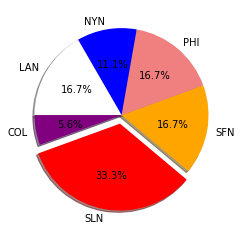

In [148]:
#NLCS appearences
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)